<a href="https://colab.research.google.com/github/ryakanbi/Capstone-Assignment/blob/main/Capstone_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Context:

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

##Objective:
The objective of this is to explore and build a decision tree, random forest regressor,logistic regression, naive bayes classifier model that will predict online payment fraud.

##Importing necessary libraries and data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Online Payment Fraud Detection.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


##Exploratory Data Analysis (EDA)
EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.

#Questions:

what is the most preferred online transaction mode by customers?

what is the most step the customers used?

what is the number of fraud compared to non fraud?

##UNIVARIATE ANALYSIS

In [ ]:
# create status column for visualization
df['Fraud_Status'] = df.isFraud.replace(1, 'Fraud').replace(0, 'No Fraud')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud_Status
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,No Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,No Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,No Fraud


In [ ]:
status = df.Fraud_Status.value_counts().reset_index(name = 'Count')
status

,index,Count
0,No Fraud,1047433
1,Fraud,1142


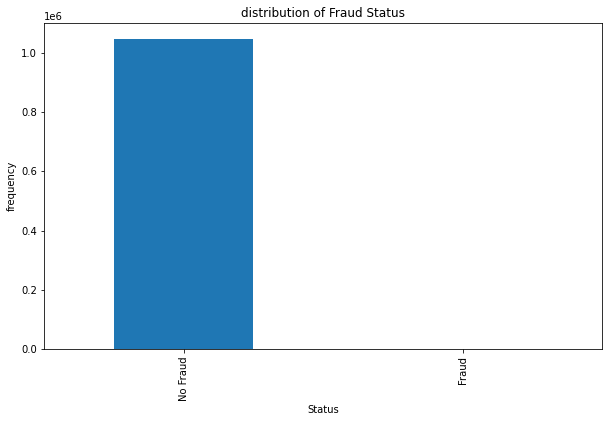

In [ ]:
plt.figure(figsize=(10,6))
df['Fraud_Status'].value_counts().plot(kind='bar');
plt.title('distribution of Fraud Status');
plt.xlabel('Status');
plt.ylabel('frequency');

In [ ]:
df['step'].nunique()

95

In [ ]:
df['step'].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

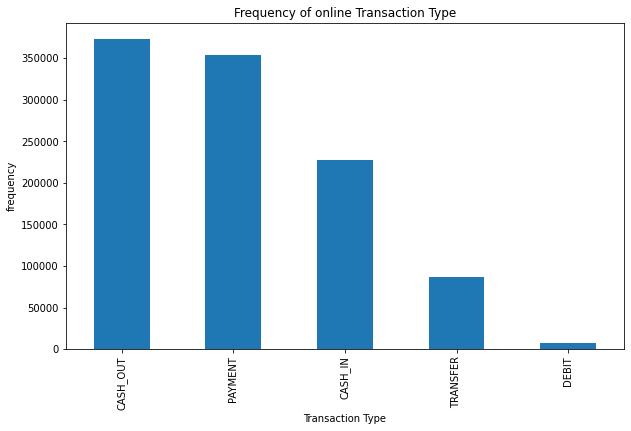

In [ ]:
plt.figure(figsize=(10,6))
df['type'].value_counts().plot(kind='bar');
plt.title('Frequency of online Transaction Type');
plt.xlabel('Transaction Type');
plt.ylabel('frequency');

Text(0.5, 1.0, 'Distribution of transaction amounts')

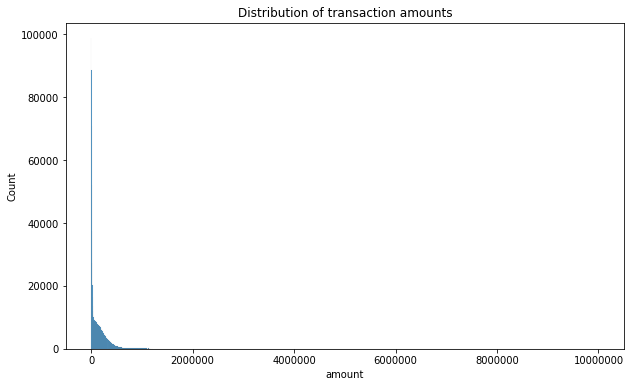

In [ ]:
#distribution of the total amount spent
plt.figure(figsize=(10,6))
sns.histplot(df['amount']);
plt.ticklabel_format(style='plain')
plt.title('Distribution of transaction amounts')

In [ ]:
#amount transaction statistic 
df.groupby('type')['amount'].sum().sort_values(ascending=False).head()

type
CASH_OUT    6.876474e+10
TRANSFER    5.503644e+10
CASH_IN     3.859476e+10
PAYMENT     3.936097e+09
DEBIT       4.219599e+07
Name: amount, dtype: float64

In [ ]:
df_type = df.groupby('type')['amount'].sum()
df_type

type
CASH_IN     3.859476e+10
CASH_OUT    6.876474e+10
DEBIT       4.219599e+07
PAYMENT     3.936097e+09
TRANSFER    5.503644e+10
Name: amount, dtype: float64

In [ ]:
corr = df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


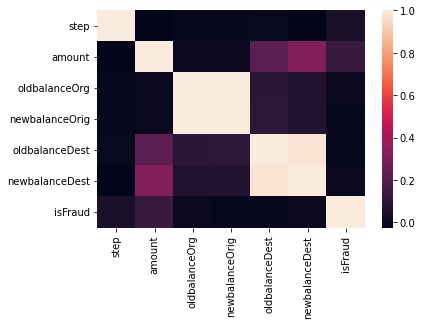

In [ ]:
sns.heatmap(corr)


##Data Preprocessing

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Fraud_Status      0
dtype: int64

In [ ]:
df.drop(columns=['step','nameOrig','nameDest','Fraud_Status'], inplace= True)

In [ ]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
y = df.pop("isFraud")
X = df

In [ ]:
y.shape

(1048575,)

In [ ]:
X = pd.get_dummies(X)
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1048570,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##Building a Regression Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score

In [ ]:
model1 = RandomForestClassifier(n_estimators=10)
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
pred = model1.predict(x_test)

In [ ]:
print("Random Forest Accuracy: ", accuracy_score(pred,y_test))
print("Random Forest Precision: ", precision_score(pred,y_test))
print("Random Forest Recall: ", recall_score(pred,y_test))
print("Random Forest f1score: ", f1_score(pred,y_test))

Random Forest Accuracy:  0.9995756145244737
Random Forest Precision:  0.6244343891402715
Random Forest Recall:  0.9583333333333334
Random Forest f1score:  0.7561643835616437


In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred1 = model2.predict(x_test)

In [ ]:
print("GaussianNB Accuracy: ", accuracy_score(pred1,y_test))
print("GaussianNB Precision: ", precision_score(pred1,y_test))
print("GaussianNB Recall: ", recall_score(pred1,y_test))
print("GaussianNB f1score: ", f1_score(pred1,y_test))

GaussianNB Accuracy:  0.5708366115919223
GaussianNB Precision:  0.995475113122172
GaussianNB Recall:  0.002438456678600326
GaussianNB f1score:  0.004864996351252737


In [ ]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred3 = model3.predict(x_test)

In [ ]:
print("LogisticRegression Accuracy: ", accuracy_score(pred3,y_test))
print("LogisticRegression Precision: ", precision_score(pred3,y_test))
print("LogisticRegression Recall: ", recall_score(pred3,y_test))
print("LogisticRegression f1score: ", f1_score(pred3,y_test))

LogisticRegression Accuracy:  0.9992227546908901
LogisticRegression Precision:  0.27601809954751133
LogisticRegression Recall:  0.953125
LogisticRegression f1score:  0.42807017543859655


##Conclusion
Random Forest obtains highest score among all scores.

The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments.